In [15]:
import matplotlib as plt
import os

In [18]:
log_one = "logs/pokegan-diffusion-256-50417642.txt"
log_two = "logs/pokegan-diffusion-256-51265180.txt"
log_three = "logs/pokegan-diffusion-256-52284282.txt"

In [19]:
data = []

for log in [log_one, log_two, log_three]:
    with open(log) as f:
        scan = False
        tmp = {}
        for line in f:
            if line == "------------------------\n":
                if scan:
                    scan = False
                else:
                    scan = True
            elif scan:
                items = line.replace(" ", "").split("|")
                if items[1] == 'step':
                    tmp[items[1]] = float(items[2])
                    data.append(tmp)
                    tmp = {}
                else:
                    tmp[items[1]] = float(items[2])

In [26]:
data[-1]

{'grad_norm': 0.00416,
 'loss': 0.00173,
 'loss_q0': 0.00356,
 'loss_q1': 0.00256,
 'loss_q2': 0.00113,
 'loss_q3': 8.84e-05,
 'mse': 0.00173,
 'mse_q0': 0.00356,
 'mse_q1': 0.00256,
 'mse_q2': 0.00113,
 'mse_q3': 8.84e-05,
 'samples': 27400000.0,
 'step': 1720000.0}

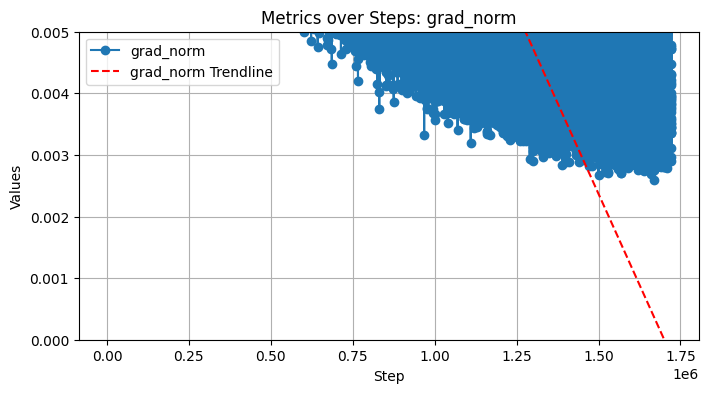

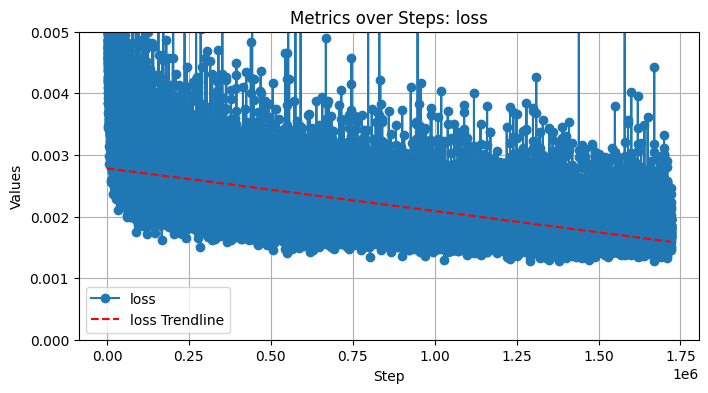

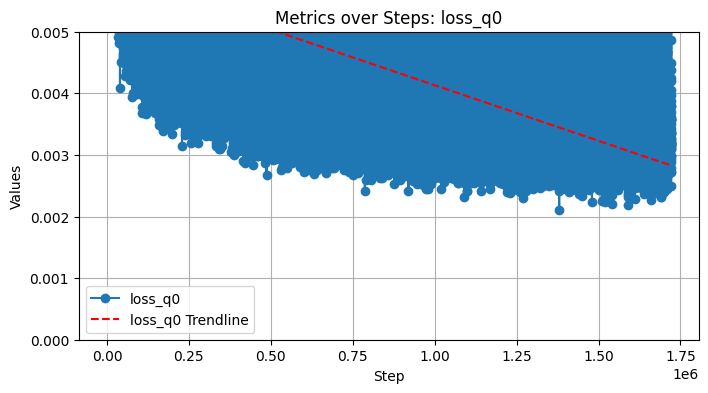

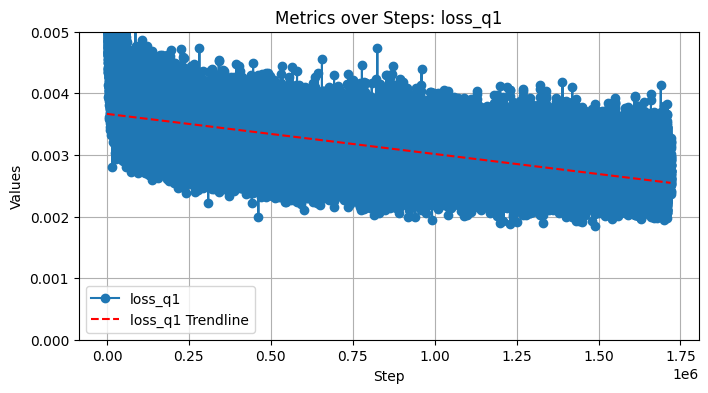

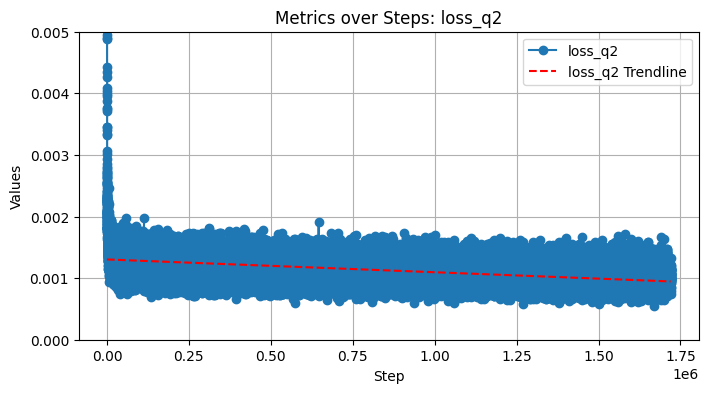

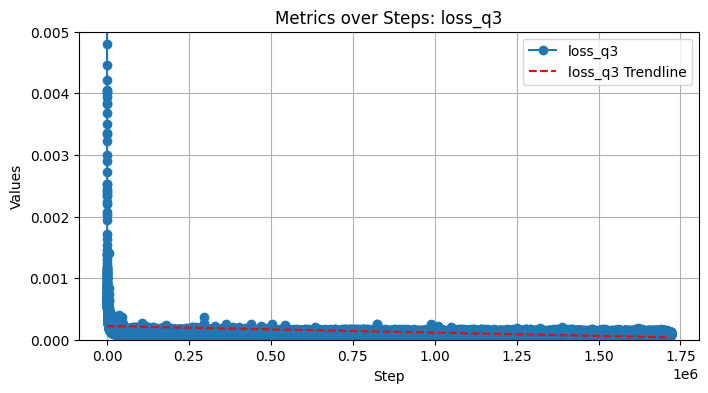

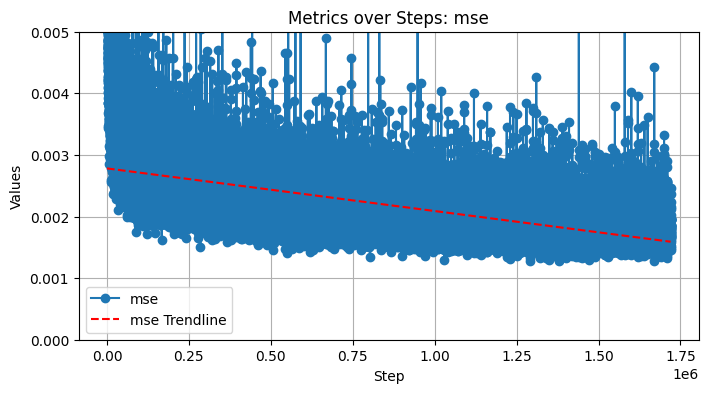

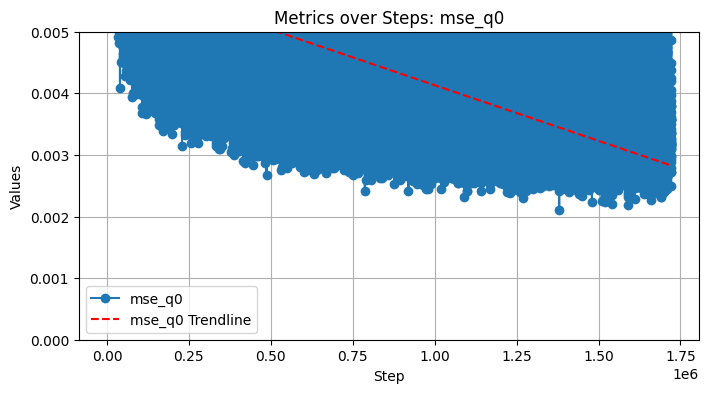

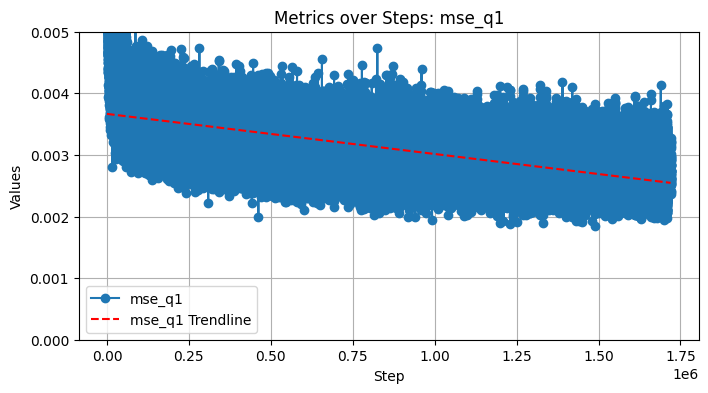

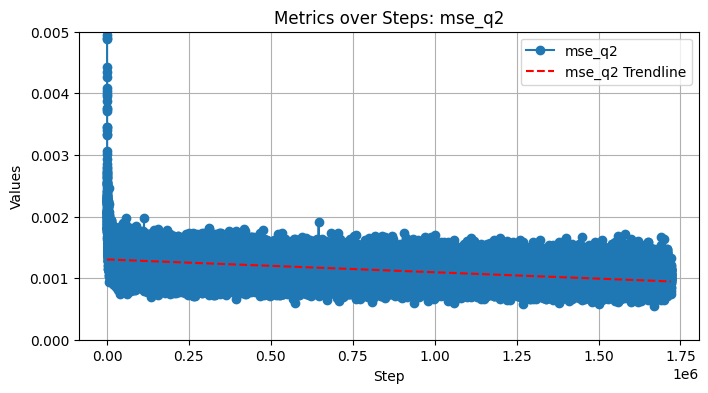

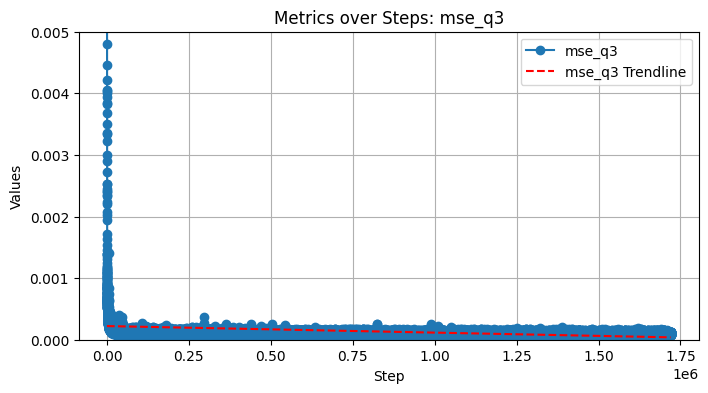

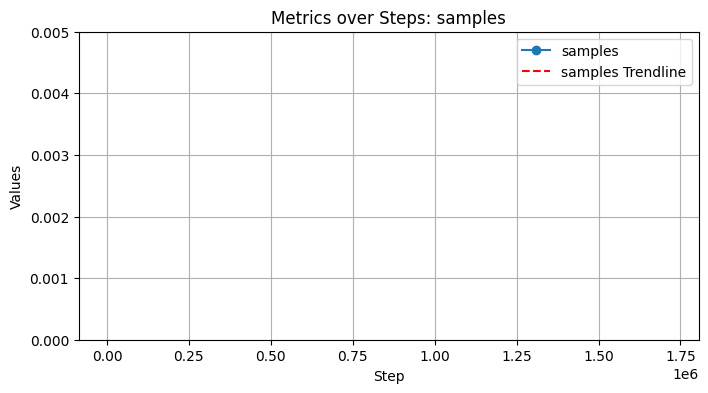

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Extract steps and keys.
steps = [entry['step'] for entry in data]
keys = [key for key in data[0] if key != 'step']

# Create a separate plot for each key.
for key in keys:
    values = [entry[key] for entry in data]
    plt.figure(figsize=(8, 4))
    
    # Apply scaling if needed for better visibility.
    min_val, max_val = 0, 0.005
    plt.ylim(min_val, max_val)
    
    plt.plot(steps, values, marker='o', label=key)  # Plot points
    
    # Fit a polynomial trendline (degree 2 for simplicity)
    if len(steps) > 1:  # Ensure there is enough data to fit a polynomial
        coeffs = np.polyfit(steps, values, 1)
        poly_trendline = np.poly1d(coeffs)
        trendline_values = poly_trendline(steps)
        plt.plot(steps, trendline_values, linestyle='--', color='red', label=f'{key} Trendline')
    
    # Add labels and legend.
    plt.xlabel('Step')
    plt.ylabel('Values')
    plt.title(f'Metrics over Steps: {key}')
    plt.legend()
    plt.grid(True)
    plt.show()